In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("=== Train-Test Split Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

=== Train-Test Split Metrics ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_kf = cross_val_score(model, X, y, cv=kf)
print("\nK-Fold Accuracy:", scores_kf.mean())
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_skf = cross_val_score(model, X, y, cv=skf)
print("Stratified K-Fold Accuracy:", scores_skf.mean())


K-Fold Accuracy: 0.9733333333333334
Stratified K-Fold Accuracy: 0.9666666666666668


In [12]:
param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid.fit(X, y)
print("\nBest Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Params: {'C': 1}
Best CV Accuracy: 0.9733333333333334


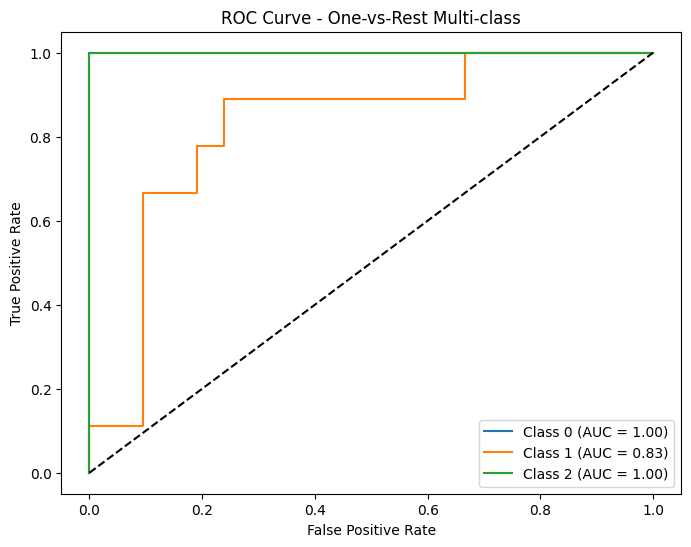

In [13]:

y_train_bin = label_binarize(y_train, classes=[0,1,2])
y_test_bin = label_binarize(y_test, classes=[0,1,2])
ovr_model = OneVsRestClassifier(LogisticRegression(max_iter=200))
ovr_model.fit(X_train, y_train_bin)
y_score = ovr_model.predict_proba(X_test)
plt.figure(figsize=(8,6))
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_score[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One-vs-Rest Multi-class")
plt.legend()
plt.show()